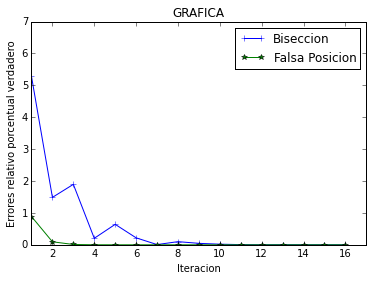

  Iteracion    Error Biseccion (%)     Error Falsa Posicion (%)
-----------  ----------------------  --------------------------
          1             5.27868                     0.887019
          2             1.48712                     0.0946725
          3             1.89578                     0.0101172
          4             0.204327                    0.00110176
          5             0.641399                    0.00014062
          6             0.218536                    3.8152e-05
          7             0.0071041                   2.72279e-05
          8             0.0986117                   2.60633e-05
          9             0.0457538                   2.59391e-05
         10             0.0193248                   2.59259e-05
         11             0.00611037                  2.59245e-05
         12             0.000496864                 2.59243e-05
         13             0.00280675                  2.59243e-05
         14             0.00115494                

In [17]:
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

xVerd=14.7802
m, g, v, t, xl, xu, xr, fxl, fxr, f1, f2, f3, xl2, xu2, xr2=68.1, 9.8, 40.0, 10.0, 12.0, 16.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 12.0, 16.0, 0.0
Error1, Error2, tabla, time, aux1, aux2=[],[],[], [], [],[]
cont=0

def fun(num):
    fc=((g*m)/num)*(1-math.exp(-(num/68.1)*10.0))-v
    return fc
    
while ((fxl*fxr)!=0):
    xr=(xl+xu)/2
    fxl=fun(xl)
    fxr=fun(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    Error1.append(erpv)
    if ((fxl*fxr)<0):
        xu=xr
    if((fxl*fxr)>0):
         xl=xr   

while ((f1*f3)!=0):
    f1=metodo1(xl2)
    f2=metodo1(xu2)
    xr2=xu2-(f2*(xl2-xu2))/(f1-f2)
    f3=metodo1(xr2)
    erpv2=math.fabs(((xVerd-xr2)/xVerd)*100)
    Error2.append(erpv2)
    if ((f1*f3)<0):
        xu2=xr2
    if((f1*f3)>0):
         xl2=xr2 

for d in range (len(Error2)):
    cont+=1
    time.append(cont)
    aux1.append(Error1[d])
    tabla.append([cont, Error1[d], Error2[d]])

plt.title("GRAFICA")
plt.axis([1, 17, 0, 7])
plt.ylabel('Errores relativo porcentual verdadero')
plt.xlabel('Iteracion')
plt.plot(time, aux1, marker='+', label="Biseccion")
plt.plot(time, Error2, marker='*', label="Falsa Posicion")
plt.legend()
plt.show()
print tabulate(tabla, headers=["Iteracion", "Error Biseccion (%) ", "Error Falsa Posicion (%)"], tablefmt="simple")